### Importing the Required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import f_oneway

Loading the Dataset

In [2]:
df = pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## 1. Explaining the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
## Display the size of the sales data set - Total number of colums and rows respectively
df.shape

(200, 5)

 * The Data set Initially (before editing) has 5 Columns/Features and 200 rows.

In [5]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

The above data doesn't contain any Missing Values

In [6]:
# Cleaning the data by removing unwanted column:
df1 = df.drop(["Unnamed: 0"], axis = 1)
df1

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


The Data shows the amount of money spent on advertisments through different modes of communication & the Sales generated.

## 2. Check the summary statistics and discuss the max, min, avg, median and percentiles

In [7]:
df1.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Insights obtained from the Above :

* Highest amount of money is spent on advertisement through TV incomparison to the other modes of communication. The median amount for advertising through TV stands at 149.75.


* The next big spending after TV ads is done on Newspaper and Radio advertisement respectively. The lowest amount of money is spent on advertisement through Radio. 


* The average Spending on the 3 modes of advertisement are :
 *  `TV` = 147.042500, `Newspaper` = 30.554000, `Radio` = 23.264000	.


* The Median Values for the 3 modes of advertisement are :
 * `TV` = 149.750000, `Newspaper` = 25.750000, `Radio` = 22.900000.


* The Maximum Amount spent on the 3 modes of advertisement are :
 * `TV` = 296.400000, `Newspaper` = 114.000000, `Radio` = 49.600000.

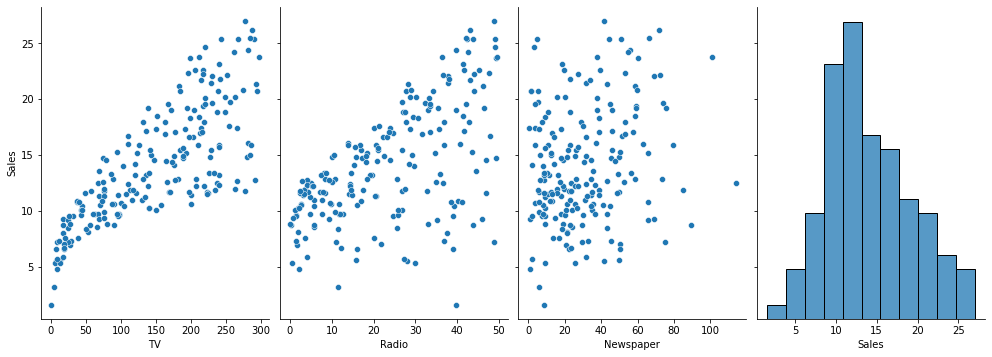

In [8]:
sns.pairplot(df1, x_vars=['TV','Radio','Newspaper', 'Sales'],y_vars='Sales', height=5, aspect=0.7);

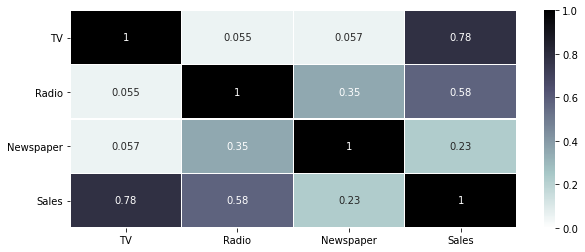

In [9]:
corr = df1.corr()
plt.subplots(figsize = (10,4))
sns.heatmap(corr,vmin = 0, vmax = 1, annot=True,linewidth = 0.25, cmap="bone_r");

From the Above two Plots we can infer the following about our Data :
    
> The amount spent on advertisement through TV has a high positive correlation (0.78) with the sales generated **i.e.** as the amount spent on TV ads increase, the sales value also tend to increase. 
     
> The amount spent on advertisement through Radio also has a positive correlation with the Sales generated. However this correlation value is less than the correlation btw TV ads & Sales. 

> It can also be observed from the correlation matrix, summary table, and the plots that :
> * Eventhough the amount spent on Radio advertisements is low, it still manages to get more sales in comparison to Newspaper ads.

##### 

## 3. Checking whether the same amount was spent for the three advertisements (TV , Radio and Newspaper). 

Let's Define our Null & Alternate Hypothesis.

**NULL HYPOTHESIS**, `Ho`: The Amount spent on the 3 modes of Advertisement are the same.
    
**ALTERNATE HYPOTHESIS**, `Ha`: Atleast one of the amount spent is not the same as others.

In [10]:
F_statistic, pvalue  = f_oneway(df1['TV'], df1['Radio'],df1['Newspaper'])
print(f"The calculated F statistic is : \t{F_statistic:.3f}")
print(f"\nThe P-value is :  \t{pvalue:.3f}")

alpha = 0.05

if pvalue < alpha:
    print("\nWe REJECT the Null Hypothesis")
elif pvalue > alpha:
    print("\nWe're Unable to reject the Null Hypothesis")

The calculated F statistic is : 	358.851

The P-value is :  	0.000

We REJECT the Null Hypothesis


##### Inference From the Hypothesis testing performed above :

> As the p-value we obtained during the test is less than the 0.05(alpha), We'll REJECT our Null Hypothesis.

> We can say that the same amount of money was `not` spent on the various modes of advertisements.,